# Análisis Comparativo Método FSDS
A través del siguiente notebook se busca detallar cuáles son las diferencias en las distribuciones entre el conjunto de muestra del dataframe de Enero y la muestra Sintética creada a partir del método inicial de FSDS

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
muestra = pd.read_csv(r"C:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\result\db_agrupado\Sample_Enero.csv")
display(muestra.tail())
display(muestra.shape)

,ZONA_TERRITORIAL,FACTOR_EXPANSION,DPTO,SEXO,EDAD,PARENTESCO_JEFE_DE_HOGAR,MADRE_RESIDE_HOGAR,PADRE_RESIDE_HOGAR,SE_CONSIDERA_CAMPESINO,COMUNIDAD_ES_CAMPESINA,...,TIPO_OCUPACION_VIVIENDA,HOGAR_TIENE_CUENTA_CORRIENTE,HOGAR_TIENE_CUENTA_AHORROS,HOGAR_TIENE_CDT,HOGAR_TIENE_PRESTAMO_COMPRA_VIVIENDA,HOGAR_TIENE_PRESTAMO_COMPRA_VEHICULO,HOGAR_TIENE_PRESTAMO_LIBRE_INVERSION,HOGAR_TIENE_TARJETA_CREDITO,NUMERO_PERSONAS_HOGAR,DISCAPACIDAD
6897,Resto,1053.192164,LA GUAJIRA,Masculino,28,Jefe (a) del hogar,No,No,No,No,...,En usufructo,No,No,No,No,No,No,No,4,Sin discapacidad
6898,Resto,681.001304,LA GUAJIRA,Femenino,26,Jefe (a) del hogar,Si,No,No,No,...,En arriendo o subarriendo,No,No,No,No,No,No,No,5,Sin discapacidad
6899,Resto,602.630910,LA GUAJIRA,Masculino,27,"Hijo(a), hijastro(a)",Si,Si,No,No,...,En usufructo,No,No,No,No,No,No,No,9,Sin discapacidad
6900,Cabecera,871.081517,CHOCO,Masculino,25,Jefe (a) del hogar,No,No,Si,Si,...,En arriendo o subarriendo,No,Si,No,No,No,No,No,3,Sin discapacidad
6901,Cabecera,86.282103,CHOCO,Masculino,18,"Hijo(a), hijastro(a)",Si,No,No,No,...,En arriendo o subarriendo,No,Si,No,No,No,No,No,3,Sin discapacidad


(6902, 43)

In [4]:
syntetic = pd.read_csv(r"C:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\result\db_agrupado\Syntetic_Enero.csv")
display(syntetic.tail())
display(syntetic.shape)

,ZONA_TERRITORIAL,FACTOR_EXPANSION,DPTO,SEXO,EDAD,PARENTESCO_JEFE_DE_HOGAR,MADRE_RESIDE_HOGAR,PADRE_RESIDE_HOGAR,SE_CONSIDERA_CAMPESINO,COMUNIDAD_ES_CAMPESINA,...,HOGAR_TIENE_CUENTA_CORRIENTE,HOGAR_TIENE_CUENTA_AHORROS,HOGAR_TIENE_CDT,HOGAR_TIENE_PRESTAMO_COMPRA_VIVIENDA,HOGAR_TIENE_PRESTAMO_COMPRA_VEHICULO,HOGAR_TIENE_PRESTAMO_LIBRE_INVERSION,HOGAR_TIENE_TARJETA_CREDITO,NUMERO_PERSONAS_HOGAR,DISCAPACIDAD,Adjusted_Weight
11289,Cabecera,37.871291,AMAZONAS,Femenino,21.000000,Jefe (a) del hogar,No,No,No,No,...,No,No,No,No,No,No,No,2.0,Sin discapacidad,400.936741
11290,Cabecera,21.307992,ANTIOQUIA,Femenino,26.000000,"Hijo(a), hijastro(a)",Si,No,No,No,...,No,Si,No,No,No,No,No,2.0,Sin discapacidad,713.741794
11291,Cabecera,59.460642,ATLANTICO,Masculino,22.000000,"Hijo(a), hijastro(a)",Si,Si,No,No,...,No,Si,No,No,No,No,No,3.0,Sin discapacidad,431.578593
11292,Cabecera,63.764622,RISALRALDA,Femenino,27.000000,"Hijo(a), hijastro(a)",Si,No,No,No,...,No,Si,No,No,No,No,No,3.0,Sin discapacidad,750.223209
11293,Cabecera,47.638920,ANTIOQUIA,Femenino,27.157276,Otro pariente,Si,No,No,No,...,No,Si,No,No,No,No,No,6.0,Sin discapacidad,2834.379700


(11294, 44)

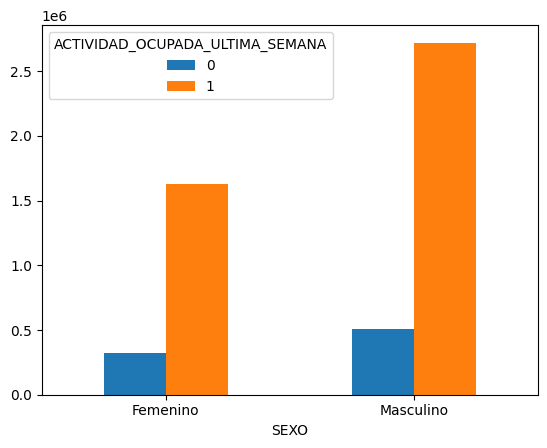

In [5]:
contingencia_muestra_sexo = pd.crosstab(columns = muestra['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA'], 
                                        index = muestra['SEXO'], 
                                        aggfunc = 'sum', 
                                        values = muestra['FACTOR_EXPANSION'])
# Visualización
contingencia_muestra_sexo.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

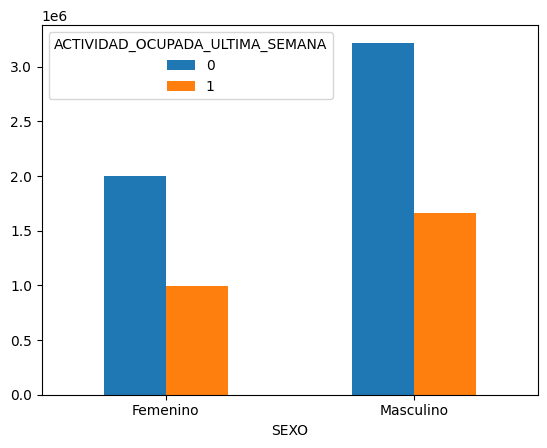

In [6]:
contingencia_muestra_sexo = pd.crosstab(columns = syntetic['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA'], 
                                        index = syntetic['SEXO'], 
                                        aggfunc = 'sum', 
                                        values = syntetic['Adjusted_Weight'])
# Visualización
contingencia_muestra_sexo.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [7]:
def visualizacion_categoricas(label:str):
    cross_muestra = pd.crosstab(columns = muestra['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA'], 
                                        index = muestra[label], 
                                        aggfunc = 'sum', 
                                        values = muestra['FACTOR_EXPANSION'])
    cross_sintetico = pd.crosstab(columns = syntetic['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA'], 
                                        index = syntetic[label], 
                                        aggfunc = 'sum', 
                                        values = syntetic['Adjusted_Weight'])
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_title('Frecuencia Normal')  # Eliminar la leyenda en axes[0]

    axes[1].set_title('Frecuencia con Pesos')
    cross_muestra.plot(kind='bar',  ax=axes[0], alpha=0.7, legend=False)
    cross_sintetico.plot(kind='bar', ax=axes[1], alpha=0.7)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

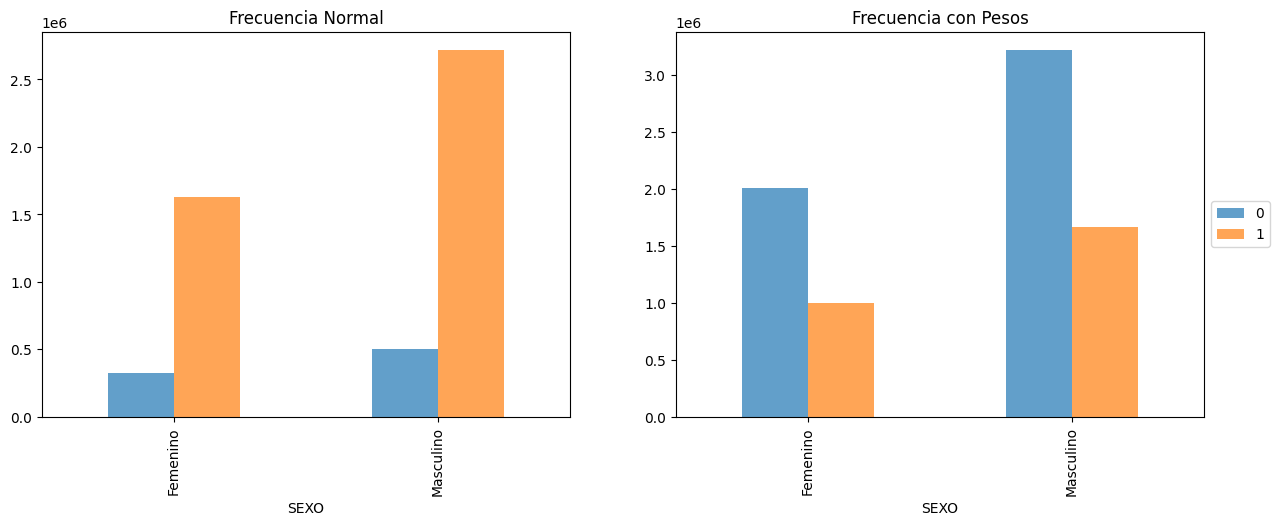

In [8]:
visualizacion_categoricas('SEXO')

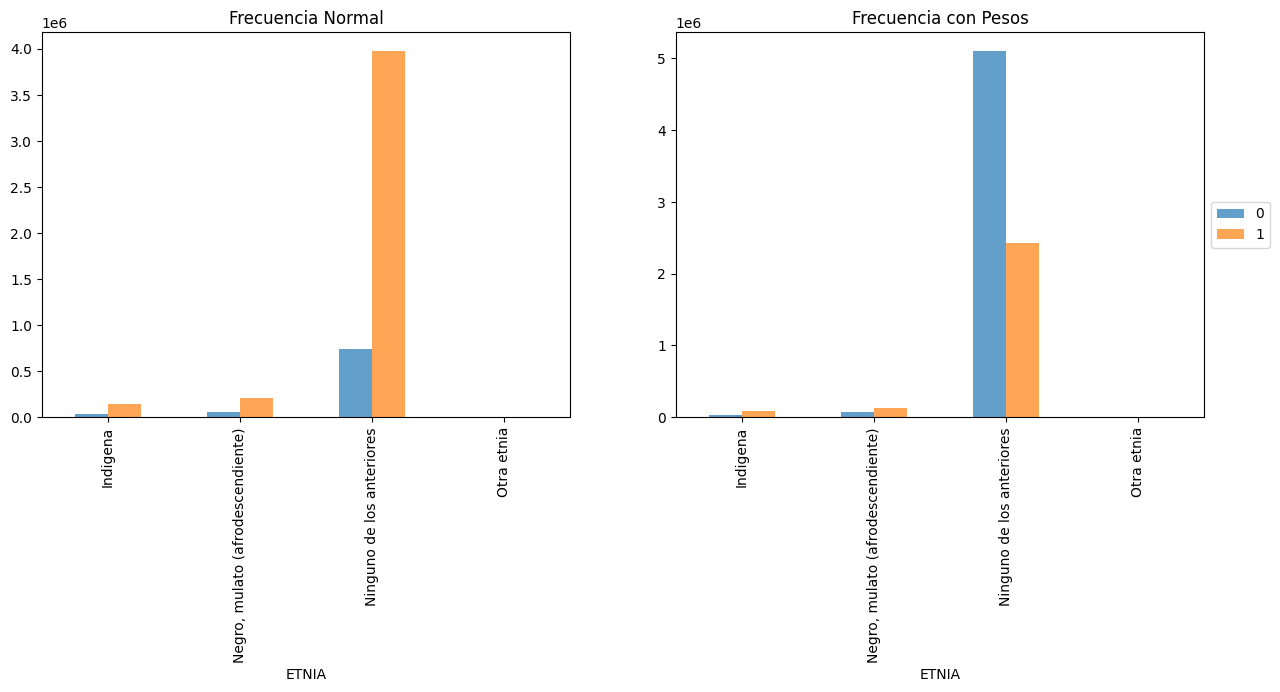

In [9]:
visualizacion_categoricas('ETNIA')

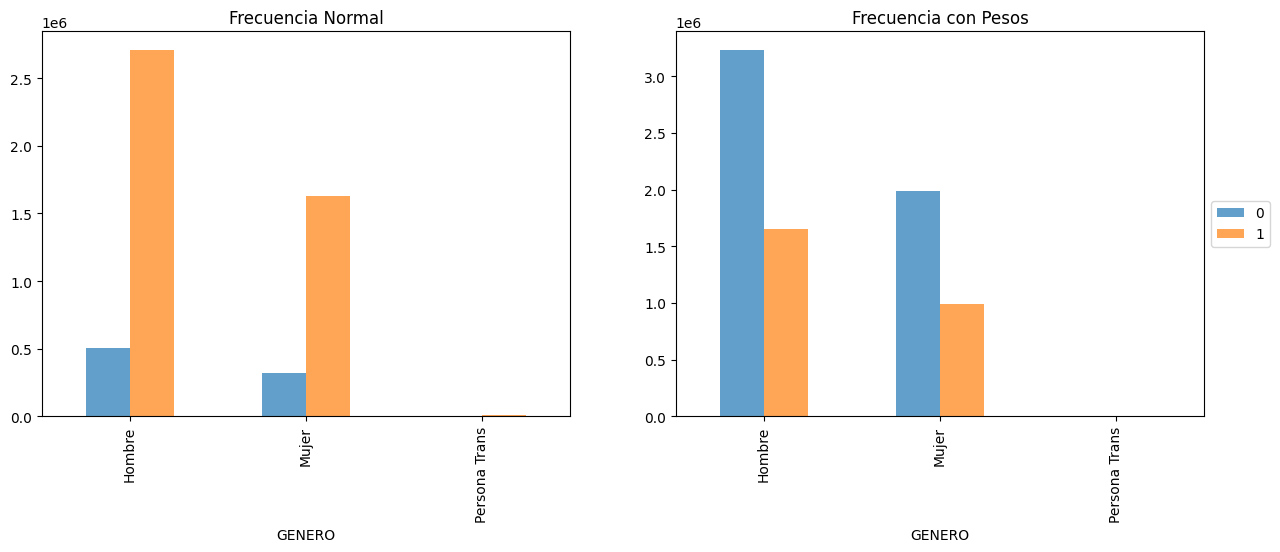

In [10]:
visualizacion_categoricas('GENERO')

# Modelo Muestra Original

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [12]:
# Muestra con pesos
X = muestra.drop(columns=['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA'])
y = muestra['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA']

In [13]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3, random_state=123, shuffle=True)

Test_weights = X_test['FACTOR_EXPANSION']
X_test = X_test.drop(columns='FACTOR_EXPANSION')

train_weights = X_train['FACTOR_EXPANSION']
X_train = X_train.drop(columns='FACTOR_EXPANSION')

In [14]:
categoric_vars = X_test.select_dtypes(include=['object']).columns.to_list()
numeric_vars = X_test.select_dtypes(include=['int64','float64']).columns.to_list()

In [15]:
preproccessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_vars),
        ('cat', OneHotEncoder(drop='first'), categoric_vars)
    ])

In [16]:
pipeline = Pipeline(steps=[('Procesamiento', preproccessing)])

In [17]:
X_train_transformed = pipeline.fit_transform(X_train, y_train).toarray()

In [18]:
lm = LogisticRegression()
lm.fit(X_train_transformed, y_train, sample_weight=train_weights)

c:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
X_test_transformed = pipeline.transform(X_test).toarray()

In [20]:
y_pred = lm.predict(X_test_transformed)

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

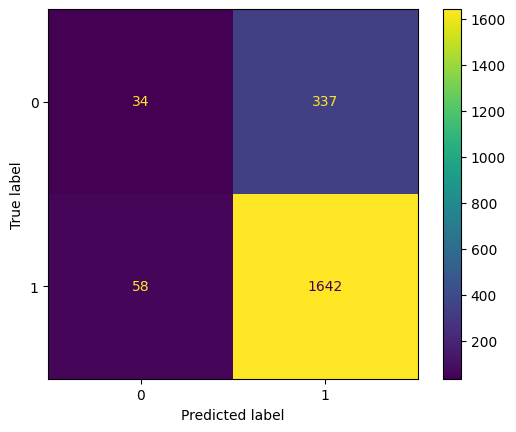

In [22]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [23]:
results = pd.DataFrame(
        {
            #'modelo':model,
            'f1_score': f1_score(y_test,y_pred),
            'precision_score':precision_score(y_test, y_pred),
            'recall_score': recall_score(y_test, y_pred),
            'accuracy_score':accuracy_score(y_test,y_pred)
            }, index = [0]
        )

display(results)

,f1_score,precision_score,recall_score,accuracy_score
0,0.892634,0.829712,0.965882,0.809271


In [24]:
from sklearn.metrics import roc_curve, auc

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

print("AUC:", auc_score)

AUC: 0.5287632788964644


# Modelo Muestra Sintetica

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [27]:
# Muestra con pesos
X = syntetic.drop(columns=['FACTOR_EXPANSION','ACTIVIDAD_OCUPADA_ULTIMA_SEMANA'])
y = syntetic['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA']

In [28]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3, random_state=123, shuffle=True)

Test_weights = X_test['Adjusted_Weight']
X_test = X_test.drop(columns='Adjusted_Weight')

train_weights = X_train['Adjusted_Weight']
X_train = X_train.drop(columns='Adjusted_Weight')

In [29]:
categoric_vars = X_test.select_dtypes(include=['object']).columns.to_list()
numeric_vars = X_test.select_dtypes(include=['int64','float64']).columns.to_list()

In [30]:
preproccessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_vars),
        ('cat', OneHotEncoder(drop='first'), categoric_vars)
    ])

In [31]:
pipeline = Pipeline(steps=[('Procesamiento', preproccessing)])

In [32]:
X_train_transformed = pipeline.fit_transform(X_train, y_train).toarray()

In [33]:
lm = LogisticRegression()
lm.fit(X_train_transformed, y_train, sample_weight=train_weights)

c:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
X_test_transformed = pipeline.transform(X_test).toarray()

In [35]:
y_pred = lm.predict(X_test_transformed)

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

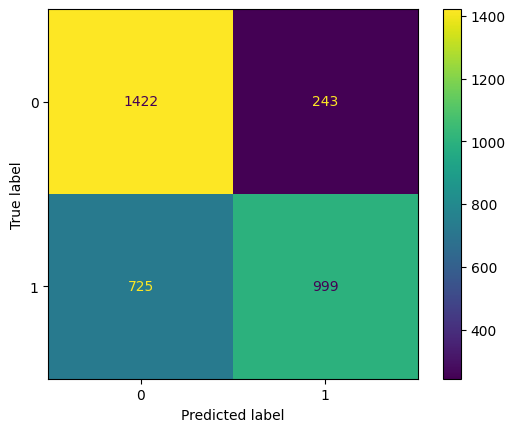

In [37]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [38]:
results = pd.DataFrame(
        {
            #'modelo':model,
            'f1_score': f1_score(y_test,y_pred),
            'precision_score':precision_score(y_test, y_pred),
            'recall_score': recall_score(y_test, y_pred),
            'accuracy_score':accuracy_score(y_test,y_pred)
            }, index = [0]
        )

display(results)

,f1_score,precision_score,recall_score,accuracy_score
0,0.673635,0.804348,0.579466,0.71437


In [39]:
from sklearn.metrics import roc_curve, auc

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

print("AUC:", auc_score)

AUC: 0.7167602056813193


In [41]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
base_learners = [
                 ('clf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('clf_2', DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=42))             
                ]
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(),cv=10, n_jobs=-1)
#clf.fit(X_train, y_train)
clf

StackingClassifier(cv=10,
                   estimators=[('clf_1',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('clf_2',
                                DecisionTreeClassifier(max_depth=15,
                                                       random_state=42))],
                   final_estimator=LogisticRegression())

In [48]:
clf.fit(X_train_transformed, y_train, sample_weight=train_weights)

StackingClassifier(cv=10,
                   estimators=[('clf_1',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('clf_2',
                                DecisionTreeClassifier(max_depth=15,
                                                       random_state=42))],
                   final_estimator=LogisticRegression())

In [50]:
y_pred = clf.predict(X_test_transformed)

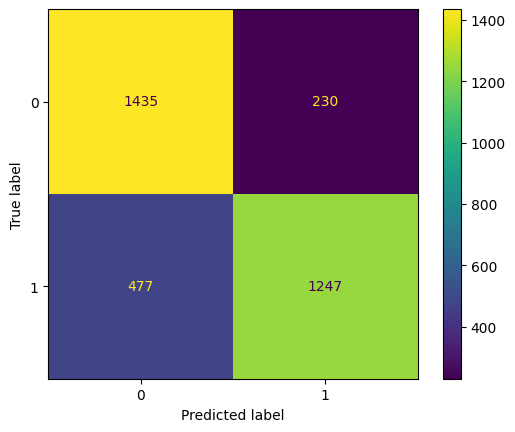

In [51]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [52]:
results = pd.DataFrame(
        {
            #'modelo':model,
            'f1_score': f1_score(y_test,y_pred),
            'precision_score':precision_score(y_test, y_pred),
            'recall_score': recall_score(y_test, y_pred),
            'accuracy_score':accuracy_score(y_test,y_pred)
            }, index = [0]
        )

display(results)

,f1_score,precision_score,recall_score,accuracy_score
0,0.779132,0.844279,0.723318,0.791384


In [53]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

print("AUC:", auc_score)

AUC: 0.7925898636455481


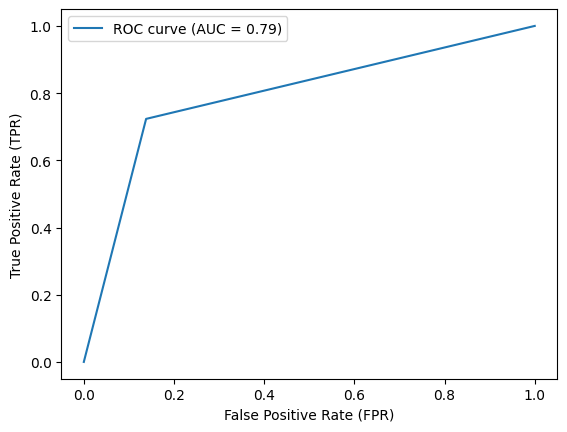

In [54]:
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.show()

In [58]:
clf.final_estimator_.coef_

array([[5.0869857 , 1.39707459]])

In [59]:
clf.decision_function

<bound method StackingClassifier.decision_function of StackingClassifier(cv=10,
                   estimators=[('clf_1',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('clf_2',
                                DecisionTreeClassifier(max_depth=15,
                                                       random_state=42))],
                   final_estimator=LogisticRegression())>

In [62]:
# Importar las librerías necesarias
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Obtener los coeficientes del modelo final (regresión logística)
coef_final = clf.final_estimator_.coef_

# Obtener las predicciones del modelo
y_pred = clf.predict(X_test_transformed)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Obtener las puntuaciones de validación cruzada
scores = cross_val_score(clf, X_train_transformed, y_train, cv=10)

# Imprimir la información
print("Coeficientes del modelo final:", coef_final)
print("Precisión del modelo:", accuracy)
print("Puntuaciones de validación cruzada:", scores)


Coeficientes del modelo final: [[5.0869857  1.39707459]]
Precisión del modelo: 0.791383889052818
Puntuaciones de validación cruzada: [0.84323641 0.84197219 0.8369153  0.85461441 0.85335019 0.83417722
 0.83797468 0.85696203 0.83670886 0.84936709]
